### Sommaire

* [Chapitre 1. Premières explorations des sets de données](#chapter1)
    * [Section 1.1. Contexte et objectifs du projet](#section_1_1)
    * [Section 1.2. Importation des librairies](#section_1_2)
    * [Section 1.3. Importation des données](#section_1_3)
    * [Section 1.4. Exploration préliminaire des variables du jeu de données](#section_1_4)
        * [Section 1.4.1. Analyse des types et des colonnes, et forme des DataFrames ](#section_1_4_1)
        * [Section 1.4.2. Analyse des doublons dans chaque DataFrame](#section_1_4_2)
        * [Section 1.4.3. Résumé de la qualité des données](#section_1_4_3)
     * [Section 1.5. Fusion de jeux de données](#section_1_5)
* [Chapitre 2. Exploration et Analyse de données avec DataViz](#chapter2)
    * [Section 2.1. Analyses Statistiques](#section_2_1)
        * [Section 2.1.1. Tests de Pearson entre les variables tailles des entreprises et salaires moyens ](#section_2_1_1)
        * [Section 2.1.2. Test de Spearman entre le salaire médian et le nombre d'entreprises de petite taille](#section_2_1_2)
        * [Section 2.1.3. Test ANOVA](#section_2_1_3)
    * [Section 2.2. Représentation graphiques](#section_2_2)
        * [Section 2.2.1. Représentations graphiques des salaires médians par région](#section_2_2_1)
        * [Section 2.2.2. Représentations graphiques de la distribution des salaires des femmes et des hommes de plus de 50 ans dans l'industrie en France](#section_2_2_2) 
        * [Section 2.2.3. Représentation graphique des salaires des femmes de plus de 50 ans par région](#section_2_2_3)
        * [Section 2.2.4. Corrélation entre les tailles d'entreprise et les salaires moyens (heatmap)](#section_2_2_4)
        * [Section 2.2.5. Représentation graphique du nombre d'enterprises par région](#section_2_2_5)
        * [Section 2.2.6. Représentation graphique du type d'entreprises par Chef lieu des régions françaises](#section_2_2_6)
    * [Section 2.3](#section_2_3)
    * [Section 2.4](#section_2_4)
    * [Section 2.5](#section_2_5)
 
* [Chapitre 3. Nettoyage de données et Pre-procession](#chapter3)
    * [Section 3.1](#section_3_1)
    * [Section 3.2](#section_3_2)
    * 
* [Chapitre 4. ](#chapter4)
    * [Section 4.1](#section_4_1)
    * [Section 4.2](#section_4_2)


### Chapitre 1. Premières explorations des sets de données <a class="anchor" id="chapter1"></a>

#### Section 1.1. Contexte et objectifs du projet <a class="anchor" id="section_1_1"></a>

**Contexte :** L'INSEE, Institut national de la statistique et des études économiques, est l'organisme officiel français chargé de recueillir une variété de données sur le territoire français. Ces données, qu'elles soient démographiques (telles que les naissances, les décès, la densité de la population...) ou économiques (comme les salaires, le nombre d'entreprises par secteur d'activité ou par taille...), offrent une vision complète de la société française. 
Elles constituent ainsi une ressource précieuse pour analyser et comprendre les dynamiques sociales, économiques et territoriales du pays.

**Objectifs :** Cette étude vise à comparer les inégalités en France selon plusieurs dimensions. Tout d'abord, nous nous pencherons sur les disparités entre les entreprises, en examinant leur localisation géographique et leur taille. 
Ensuite, nous nous intéresserons aux inégalités au sein de la population, en analysant les variations de salaires en fonction de différents critères tels que la catégorie d’emploi et la localisation géographique. 
Enfin, nous concentrerons notre attention sur une grande ville en particulier, afin d'étudier de manière approfondie les inégalités qui peuvent exister à l'échelle locale.


#### Section 1.2. Importation des librairies <a class="anchor" id="section_1_2"></a>

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


# Import modules from the appended path
from fi_functions import *

#### Section 1.3. Importation des données <a class="anchor" id="section_1_3"></a>

In [2]:
df_entreprises = pd.read_csv('../data/base_etablissement_par_tranche_effectif.csv') 
display(df_entreprises.head())

df_salary = pd.read_csv('../data/net_salary_per_town_categories_update2021.csv', sep = ';')
display(df_salary.head())

df_name_geographic = pd.read_csv('../data/name_geographic_information.csv', na_values = '-') 
display(df_name_geographic.head())

df_population = pd.read_csv('../data/population.csv', dtype={'CODGEO': object} )
display(df_population.head())

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


,CODGEO,SNHM20,SNHMC20,SNHMP20,SNHME20,SNHMO20,SNHMF20,SNHMFC20,SNHMFP20,SNHMFE20,...,SNHMHO20,SNHM1820,SNHM2620,SNHM5020,SNHMF1820,SNHMF2620,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020
0,1004,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.806580,14.368130,11.045518,...,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.130620,19.226540
1,1007,15.261333,24.391671,16.179052,11.917058,12.520221,13.855898,21.532587,15.160246,11.951341,...,12.881610,10.544073,15.263487,16.961952,10.618428,14.034526,14.418987,10.487221,16.229187,19.324302
2,1014,14.578709,27.940065,16.384056,12.175141,11.848787,12.570863,20.702968,13.198429,12.152977,...,12.304387,11.058325,14.116861,16.528222,10.295307,12.226430,13.932078,11.623660,15.517659,18.409024
3,1024,14.658174,23.817275,16.319296,11.905547,12.127913,13.053780,20.157674,14.923592,11.414435,...,12.525517,10.498073,14.627982,16.404495,10.031113,13.268833,13.691905,10.812016,15.505663,18.422798
4,1025,14.952910,25.822076,15.365464,11.663794,12.400297,13.444614,22.271103,14.233353,11.410936,...,12.666390,10.385396,14.750372,16.854860,10.309374,13.513608,14.336143,10.442608,15.580433,18.421533


,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,01001,L'Abergement-Clémenciat,11,0,1,15
1,COM,01001,L'Abergement-Clémenciat,11,0,2,15
2,COM,01001,L'Abergement-Clémenciat,11,5,1,20
3,COM,01001,L'Abergement-Clémenciat,11,5,2,20
4,COM,01001,L'Abergement-Clémenciat,11,10,1,20


#### Section 1.4. Exploration préliminaire des variables du jeu de données <a class="anchor" id="section_1_4"></a> 

##### Section 1.4.1. Analyse des types et des colonnes, et forme des DataFrames <a class="anchor" id="section_1_4_1"></a> 

In [3]:
# Review data types and columns info and shape

print(df_entreprises.info())
print(df_salary.info())
print(df_name_geographic.info())
print(df_population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36681 non-null  object
 1   LIBGEO    36681 non-null  object
 2   REG       36681 non-null  int64 
 3   DEP       36681 non-null  object
 4   E14TST    36681 non-null  int64 
 5   E14TS0ND  36681 non-null  int64 
 6   E14TS1    36681 non-null  int64 
 7   E14TS6    36681 non-null  int64 
 8   E14TS10   36681 non-null  int64 
 9   E14TS20   36681 non-null  int64 
 10  E14TS50   36681 non-null  int64 
 11  E14TS100  36681 non-null  int64 
 12  E14TS200  36681 non-null  int64 
 13  E14TS500  36681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5421 non-null   object 


In [4]:
# Shape for each DataFrame 

print("Shape of DF:")
print("entreprise:",df_entreprises.shape)
print("salary:",df_salary.shape)
print("name_geographic:",df_name_geographic.shape)
print("population:",df_population.shape)

Shape of DF:
entreprise: (36681, 14)
salary: (5421, 25)
name_geographic: (36840, 14)
population: (8536584, 7)


##### Section 1.4.2. Analyse des doublons dans chaque DataFrame<a class="anchor" id="section_1_4_2"></a> 

In [5]:
# Number of duplicates for each DataFrame

print('Number of duplicates :')
print('entreprises :', df_entreprises.duplicated().sum())
print('salary :', df_salary.duplicated().sum())
print('name_geographic :', df_name_geographic.duplicated().sum(), ', name_geographic by code_insee :', df_name_geographic.duplicated(subset=['code_insee']).sum())
print('population :', df_population.duplicated().sum())

Number of duplicates :
entreprises : 0
salary : 0
name_geographic : 0 , name_geographic by code_insee : 147
population : 0


##### Section 1.4.3. Résumé de la qualité des données<a class="anchor" id="section_1_4_3"></a>  

In [6]:
summary(df_entreprises)
summary(df_salary)
summary(df_population)
summary_short(df_name_geographic)

,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,36681,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,34142,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
REG,int64,0.0,27,0,0.0,Too many values...,49.415365,Nothing to report
DEP,object,0.0,101,0,0.0,Too many values...,62,Nothing to report
E14TST,int64,0.0,1423,399,1.0,Too many values...,123.456067,Nothing to report
E14TS0ND,int64,0.0,1125,579,2.0,Too many values...,83.555301,Nothing to report
E14TS1,int64,0.0,650,6118,17.0,Too many values...,27.291486,Nothing to report
E14TS6,int64,0.0,272,20324,55.0,Too many values...,5.22055,Nothing to report
E14TS10,int64,0.0,220,22641,62.0,Too many values...,3.800333,Nothing to report
E14TS20,int64,0.0,160,25884,71.0,Too many values...,2.296448,Nothing to report


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,5421,0,0.0,Too many values...,10003,Nothing to report
SNHM20,float64,0.0,5421,0,0.0,Too many values...,15.440462,Nothing to report
SNHMC20,float64,0.0,5421,0,0.0,Too many values...,25.194776,Nothing to report
SNHMP20,float64,0.0,5421,0,0.0,Too many values...,15.847373,Nothing to report
SNHME20,float64,0.0,5421,0,0.0,Too many values...,11.573974,Nothing to report
SNHMO20,float64,0.0,5421,0,0.0,Too many values...,12.124348,Nothing to report
SNHMF20,float64,0.0,5421,0,0.0,Too many values...,13.824962,Nothing to report
SNHMFC20,float64,0.0,5421,0,0.0,Too many values...,22.03816,Nothing to report
SNHMFP20,float64,0.0,5421,0,0.0,Too many values...,14.682978,Nothing to report
SNHMFE20,float64,0.0,5421,0,0.0,Too many values...,11.402604,Nothing to report


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
NIVGEO,object,0.0,1,0,0.0,[COM],COM,It's imbalanced!
CODGEO,object,0.0,35868,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,33452,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
MOCO,int64,0.0,7,0,0.0,"[11, 12, 21, 22, 23, 31, 32]",11,Nothing to report
AGEQ80_17,int64,0.0,17,502152,6.0,Too many values...,0,Nothing to report
SEXE,int64,0.0,2,0,0.0,"[1, 2]",1,Nothing to report
NB,int64,0.0,2953,6325631,74.0,Too many values...,7.446743,Nothing to report


,nb_unique_values,%_missing_values,nb_missing_values,type
EU_circo,8,0.0,0,object
code_région,28,0.0,0,int64
nom_région,28,0.0,0,object
chef.lieu_région,28,0.0,0,object
numéro_département,102,0.0,0,object
nom_département,102,0.0,0,object
préfecture,102,0.0,0,object
numéro_circonscription,24,0.0,0,int64
nom_commune,34142,0.0,0,object
codes_postaux,6106,0.0,0,object


**Conclusion pour df_name_geographic :** 
- Les noms des colonnes en français, tandis que ceux des autres DataFrames sont en anglais. Il est donc nécessaire de les renommer pour une cohérence.
- La colonne "code_insee" semble correspondre à "CODGEO", mais il y a un '0' au debut, par example, '1024' au lieu de '01024'.
- Les colonnes "latitude", "longitude", "éloignement" présentent respectivement 2929, 2841 et 2962 valeurs manquantes (NaN).
- La colonne "longitude" devrait normalement être de type float64. Cependant, nous n'avons pas pu modifier le type en raison de problèmes avec les données. Par exemple :
  
    - L'utilisation de ',' au lieu de '.' pour la notation décimale : **'5,83'**
    - La présence de '-' : ceux-ci doivent être remplacés par des valeurs NaN.

**Conclusion pour df_salary :** 
-  Il y a de nombreuses catégories de salariés, mais on peut voir qu'elles sont divisées selon les catégories suivantes : catégorie d'emploi, sexe et âge. Ça peut faciliter analyse. 
- La colonne "CODGEO" semble correspondre à "CODGEO", mais il y a un '0' au debut, par example, '1024' au lieu de '01024'.

**Conclusion pour df_entreprises :**  
- Il y a beaucoup de zeros dans la DF pour les colonnes suivantes :
    - 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'
- Pour améliorer cela, nous pouvons créer de nouvelles colonnes qui catégorisent les données en fonction de tailles d'entreprises plus vastes :
    - Micro entreprise: 0 <= taille < 10 personnes
    - Petit entreprise: 10 <= taille < 50 personnes
    - Moyenne entreprise :  50 <= taille < 200 personnes
    - Grande Entreprise : taille >= 200 personnes

#### Section 1.5. Fusion de jeux de données <a class="anchor" id="section_1_5"></a> 

In [84]:
df_name_geographic_final = pd.read_csv('../data/name_geographic_final.csv', dtype={0: 'object', 5: 'object', 7: 'object', 14: 'object'}) 

# The CSV import may have removed leading "0"s from the INSEE CODE, this function adds them back
add_leading_zeros(df_name_geographic_final,'COM_code_insee', 5)

display(df_name_geographic_final.head())

,COM_code_insee,COM_nom,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_nom,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,...,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS
0,01001,L'Abergement-Clémenciat,46.153721,4.925850,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.27,43.32,357.03
1,01001,L'Abergement-Clémenciat,46.153721,4.925850,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.27,43.32,357.03
2,01002,L'Abergement-de-Varey,46.009606,5.428088,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.88,53.50,391.78
3,01002,L'Abergement-de-Varey,46.009606,5.428088,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.88,53.50,391.78
4,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78


In [85]:
# Verification of duplicates by code_insee in df_name_geographic
df_name_geographic_final[df_name_geographic_final.duplicated(subset = ['COM_code_insee'])]

,COM_code_insee,COM_nom,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_nom,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,...,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS
1,01001,L'Abergement-Clémenciat,46.153721,4.925850,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.27,43.32,357.03
3,01002,L'Abergement-de-Varey,46.009606,5.428088,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.88,53.50,391.78
5,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78
7,01005,Ambérieux-en-Dombes,45.996164,4.911967,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,34.65,25.96,371.49
9,01006,Ambléon,45.749886,5.594585,||,01,Ain,01053,bourg en bresse,46.205014,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,57.34,59.47,422.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271872,97617,Tsingoni,-12.782686,45.134576,||,976,Mayotte,97611,mamoudzou,-12.790232,...,-12.790232,45.194781,||,Paris,48.852937,2.35005,||,6.58,6.58,8037.00
271873,97617,Tsingoni,-12.782686,45.134576,||,976,Mayotte,97611,mamoudzou,-12.790232,...,-12.790232,45.194781,||,Paris,48.852937,2.35005,||,6.58,6.58,8037.00
271874,97617,Tsingoni,-12.782686,45.134576,||,976,Mayotte,97611,mamoudzou,-12.790232,...,-12.790232,45.194781,||,Paris,48.852937,2.35005,||,6.58,6.58,8037.00
271875,97617,Tsingoni,-12.782686,45.134576,||,976,Mayotte,97611,mamoudzou,-12.790232,...,-12.790232,45.194781,||,Paris,48.852937,2.35005,||,6.58,6.58,8037.00


In [86]:
#Delete Duplicates on INSEE CODE
df_name_geographic_final=df_name_geographic_final.drop_duplicates(subset=["COM_code_insee"], keep="first")

In [10]:
# MERGE START

In [11]:
# MERGE Entreprise & df_name_geographic_final

In [87]:
df_entreprises24 = pd.read_csv('../data/df_entreprises24.csv',  dtype={0: 'object'}) 

# The CSV import may have removed leading "0"s from the CODGEO, this function adds them back
add_leading_zeros(df_entreprises24,'CODGEO', 5)
df_entreprises24=df_entreprises24.drop(['ET_BE', 'ET_BE_0sal', 'ET_BE_1_4', 'ET_BE_5_9',
       'ET_BE_10_19', 'ET_BE_20_49', 'ET_BE_50_99', 'ET_BE_100_199',
       'ET_BE_200_499', 'ET_BE_500P', '||'], axis=1)

display(df_entreprises24.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises
0,01001,0,0,0,0,0,0
1,01002,0,0,0,0,0,0
2,01004,33,2,14,15,2,0
3,01005,4,0,2,2,0,0
4,01006,0,0,0,0,0,0


In [88]:
# Merge the 'df_entreprises24' DataFrame with the 'df_name_geographic_final' DataFrame based on the 'CODGEO' and 'COM_code_insee' columns
df_merge1=df_entreprises24.merge(df_name_geographic_final,left_on='CODGEO',right_on='COM_code_insee')

display(df_merge1.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,COM_code_insee,COM_nom,COM_latitude,...,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS
0,01001,0,0,0,0,0,0,01001,L'Abergement-Clémenciat,46.153721,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.27,43.32,357.03
1,01002,0,0,0,0,0,0,01002,L'Abergement-de-Varey,46.009606,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.88,53.50,391.78
2,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78
3,01005,4,0,2,2,0,0,01005,Ambérieux-en-Dombes,45.996164,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,34.65,25.96,371.49
4,01006,0,0,0,0,0,0,01006,Ambléon,45.749886,...,45.770061,4.828519,||,Paris,48.852937,2.35005,||,57.34,59.47,422.87


In [14]:
# Add leading zeros to the 'CODGEO' column in the 'df_salary' DataFram
add_leading_zeros(df_salary, 'CODGEO', 5)

# Merge the 'df_merge1' DataFrame with the 'df_salary' DataFrame based on the 'CODGEO' column
df_merge2=df_merge1.merge(df_salary,left_on='CODGEO',right_on='CODGEO')
display(df_merge2.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,COM_code_insee,COM_nom,COM_latitude,...,SNHMHO20,SNHM1820,SNHM2620,SNHM5020,SNHMF1820,SNHMF2620,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020
0,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,...,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.130620,19.226540
1,01007,12,0,10,2,0,0,01007,Ambronay,46.005691,...,12.881610,10.544073,15.263487,16.961952,10.618428,14.034526,14.418987,10.487221,16.229187,19.324302
2,01014,52,1,29,17,5,0,01014,Arbent,46.283608,...,12.304387,11.058325,14.116861,16.528222,10.295307,12.226430,13.932078,11.623660,15.517659,18.409024
3,01024,9,0,6,2,1,0,01024,Attignat,46.286061,...,12.525517,10.498073,14.627982,16.404495,10.031113,13.268833,13.691905,10.812016,15.505663,18.422798
4,01025,7,0,5,2,0,0,01025,Bâgé-Dommartin,46.327468,...,12.666390,10.385396,14.750372,16.854860,10.309374,13.513608,14.336143,10.442608,15.580433,18.421533


In [15]:
# Merge the 'df_merge2' DataFrame with the 'df_population' DataFrame based on the 'CODGEO' column
df_merge3=df_merge2.merge(df_population,left_on='CODGEO',right_on='CODGEO')
display(df_merge3.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,COM_code_insee,COM_nom,COM_latitude,...,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020,NIVGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,...,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,0,1,416
1,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,...,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,0,2,469
2,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,...,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,5,1,331
3,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,...,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,5,2,276
4,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,...,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,10,1,313


In [16]:
## Used once to export final merged file

# Specify the file path where you want to save the CSV file
# file_path = 'df_merge.csv'
# Save the DataFrame to a CSV file
# df_merge3.to_csv(file_path, index=False)  # Set index=False to avoid saving row numbers as a column

In [17]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278536 entries, 0 to 1278535
Data columns (total 63 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CODGEO                    1278536 non-null  object 
 1   Total_Salaries            1278536 non-null  int64  
 2   nb_auto_entrepreneur      1278536 non-null  int64  
 3   nb_micro_entreprises      1278536 non-null  int64  
 4   nb_small_entreprises      1278536 non-null  int64  
 5   nb_medium_entreprises     1278536 non-null  int64  
 6   nb_large_entreprises      1278536 non-null  int64  
 7   COM_code_insee            1278536 non-null  object 
 8   COM_nom                   1278536 non-null  object 
 9   COM_latitude              1278536 non-null  float64
 10  COM_longitude             1278536 non-null  float64
 11  DEPT                      1278536 non-null  object 
 12  DEPT_code                 1278536 non-null  object 
 13  DEPT_nom                  1

### Chapitre 2. Exploration et Analyse de données avec DataViz <a class="anchor" id="chapter2"></a>

#### Section 2.1. Analyses Statistiques <a class="anchor" id="section_2_1"></a>

##### Section 2.1.1 Tests de Pearson entre les variables tailles des entreprises et salaires moyens  <a class="anchor" id="section_2_1_1"></a>

Le test de corrélation de Pearson nous permet d'évaluer la relation entre deux variables quantitatives. Dans notre analyse, nous l'avons utilisé pour explorer la relation entre le salaire médian (SNHM20) et deux mesures de la taille des entreprises : le nombre d'entreprises de grande taille (nb_large_entreprises) et le nombre d'entreprises de petite taille (nb_micro_entreprises).


**Test 1. SNHM20 (salaire médian) et nb_large_entreprises (nombre d'entreprises de grande taille)**


**Hypothèses :**

- H0 : Il n'y a pas de corrélation entre les variables.
- H1 : Il y a une corrélation entre les variables.

Si la valeur p < α, il existe une corrélation entre le salaire médian et le nombre d'entreprises de grande taille. Ce coefficient α indique l'intensité de la corrélation.

In [71]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
test_pearson_lg = pearsonr(x = df_merge3["SNHM20"], y = df_merge3["nb_large_entreprises"]) 

print("p-value: ", test_pearson[1])
print("coefficient: ", test_pearson[0])

p-value:  2.1442705006895858e-159
coefficient:  0.023787517399340725


**Conclusions** 

Les résultats montrent un coefficient de corrélation de 0.0238 avec une valeur p extrêmement faible de 2.14e-159. 

La valeur p < 0.05, nous rejetons H0 et acceptons H1. Il existe une corrélation positive de faible intensité entre le salaire médian et le nombre d'entreprises de grande taille


**Test 2. SNHM20 (salaire médian) et nb_micro_entreprises (nombre d'entreprises de petite taille)**

**Hypothèses :**

- H0 : Il n'y a pas de corrélation entre les variables.
- H1 : Il y a une corrélation entre les variables.

Si la valeur p > α* : il n'y a pas de corrélation entre le salaire médian et le nombre d'entreprises de petite taille.
<p>*Ce coefficient α montre l'intensité de la corrélation.</p>

In [73]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
test_pearson_mc = pearsonr(x = df_merge3["SNHM20"], y = df_merge3["nb_micro_entreprises"]) 

print("p-value: ", test_pearson_mc[1])
print("coefficient: ", test_pearson_mc[0])


p-value:  2.972156049087291e-25
coefficient:  -0.009182174106581193


**Conclusions :**
Le test de corrélation de Pearson entre ces deux variables montrent un coefficient de corrélation de -0.00918 avec une valeur p de 2.97e-25. 

La valeur p < 0.05, nous rejetons H0 et acceptons H1 : il y a une corrélation négative de faible intensité entre le salaire médian et le nombre d'entreprises de petite taille.

Etant donné le faible coefficient de corrélation, on peux se demander s'il n'y a pas une correlation non-linéaire. De plus, nous voyons sur le graphique ci-dessous qu'il semble y avoir une relation mais que celle-ci n'est pas linéaire. 

Nous pouvons vérifier cette analyse de corrélation avec un test de Spearman.

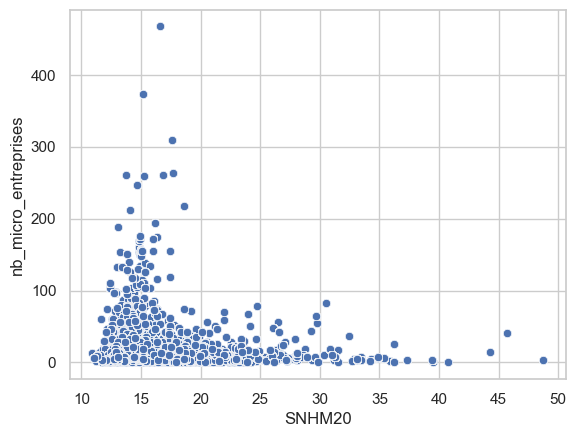

In [90]:
# Plot a scatter plot to visualize the relationship between median salary (SNHM20) 
# and the number of small enterprises (nb_micro_entreprises)

sns.scatterplot(x='SNHM20', y='nb_micro_entreprises', data = df_merge3);

##### Section 2.1.2 Test de Spearman entre le salaire médian et le nombre d'entreprises de petite taille <a class="anchor" id="section_2_1_2"></a>

**Hypothèses :**

- H0 : Il n'y a pas de corrélation entre les variables.
- H1 : Il y a une corrélation entre les variables.

Si la valeur p > α* : il n'y a pas de corrélation entre le salaire médian et le nombre d'entreprises de petite taille.
<p>*Ce coefficient α montre l'intensité de la corrélation.</p>

In [21]:
from scipy import stats

x = df_merge3['SNHM20']
y = df_merge3['nb_micro_entreprises']

# Computing the Spearman correlation coefficient

spearman_corr, spearman_p_value = stats.spearmanr(x, y)

print('Spearman correlation coefficient:', spearman_corr)
print('p-value:', spearman_p_value)

Spearman correlation coefficient: -0.05548199812104802
p-value: 0.0


**Conclusions :**

Après avoir calculé le coefficient de corrélation de Spearman entre le salaire médian et le nombre d'entreprises de petite taille, nous avons obtenu un coefficient de -0.0555 avec une p de 0.0.

Cela confirme une corrélation négative faible entre ces deux variables. Comparativement, avec le test de corrélation de Pearson, nous avions obtenu un coefficient de corrélation de -0.00918, également indiquant une corrélation négative, mais moins forte.

La valeur p < 0.05, nous rejetons H0 et acceptons H1. 
Il existe une corrélation entre le salaire médian et le nombre d'entreprises de grande taille.

##### Section 2.1.3 Test ANOVA <a class="anchor" id="section_2_1_3"></a>

Test ANOVA entre les régions (REG_nom) et le salaire médian (SNHM20)

**Hypothesis :** 

- H0 : Aucune influence significative entre les régions et le salaire médian
- H1 : Influence significative entre les régions et le salaire médian

In [22]:
## Test
import statsmodels.api 
result = statsmodels.formula.api.ols('SNHM20 ~ REG_nom', data=df_merge3).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

print("p-value (PR(>F)) < 5%  - we reject H0 and accept H1")

,df,sum_sq,mean_sq,F,PR(>F)
REG_nom,16.0,2.789358e+06,174334.893098,25687.40277,0.0
Residual,1278519.0,8.677034e+06,6.786786,NaN,NaN


p-value (PR(>F)) < 5%  - we reject H0 and accept H1


Il existe une influence significative entre les régions et le salaire médian.

#### Section 2.2. Représentations graphiques <a class="anchor" id="section_2_2"></a>

##### Section 2.2.1 Représentations graphiques des salaires médians par région <a class="anchor" id="section_2_2_1"></a>

<Figure size 2000x2000 with 0 Axes>

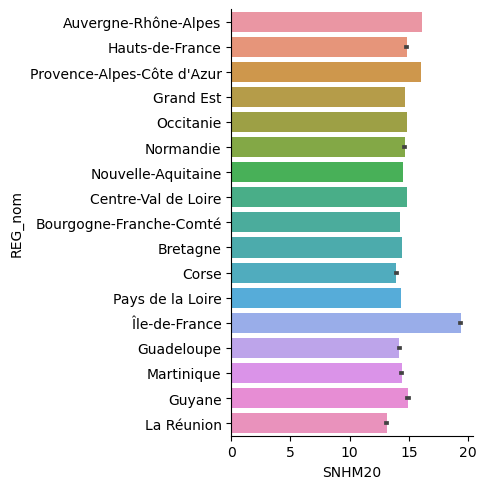

In [66]:
#Barplot
plt.figure(figsize=(20, 20))
sns.catplot(x = 'SNHM20', y = 'REG_nom', kind = 'bar', data = df_merge3);
plt.show();

**Conclusion :** 
- La région où le salaire médian dans l'industrie est le plus élevé est l'Ile de France.
- La région où le salaire médian dans l'industrie est le plus faible est La Réunion.
- On constate une relative égalité dans les autres regions. 

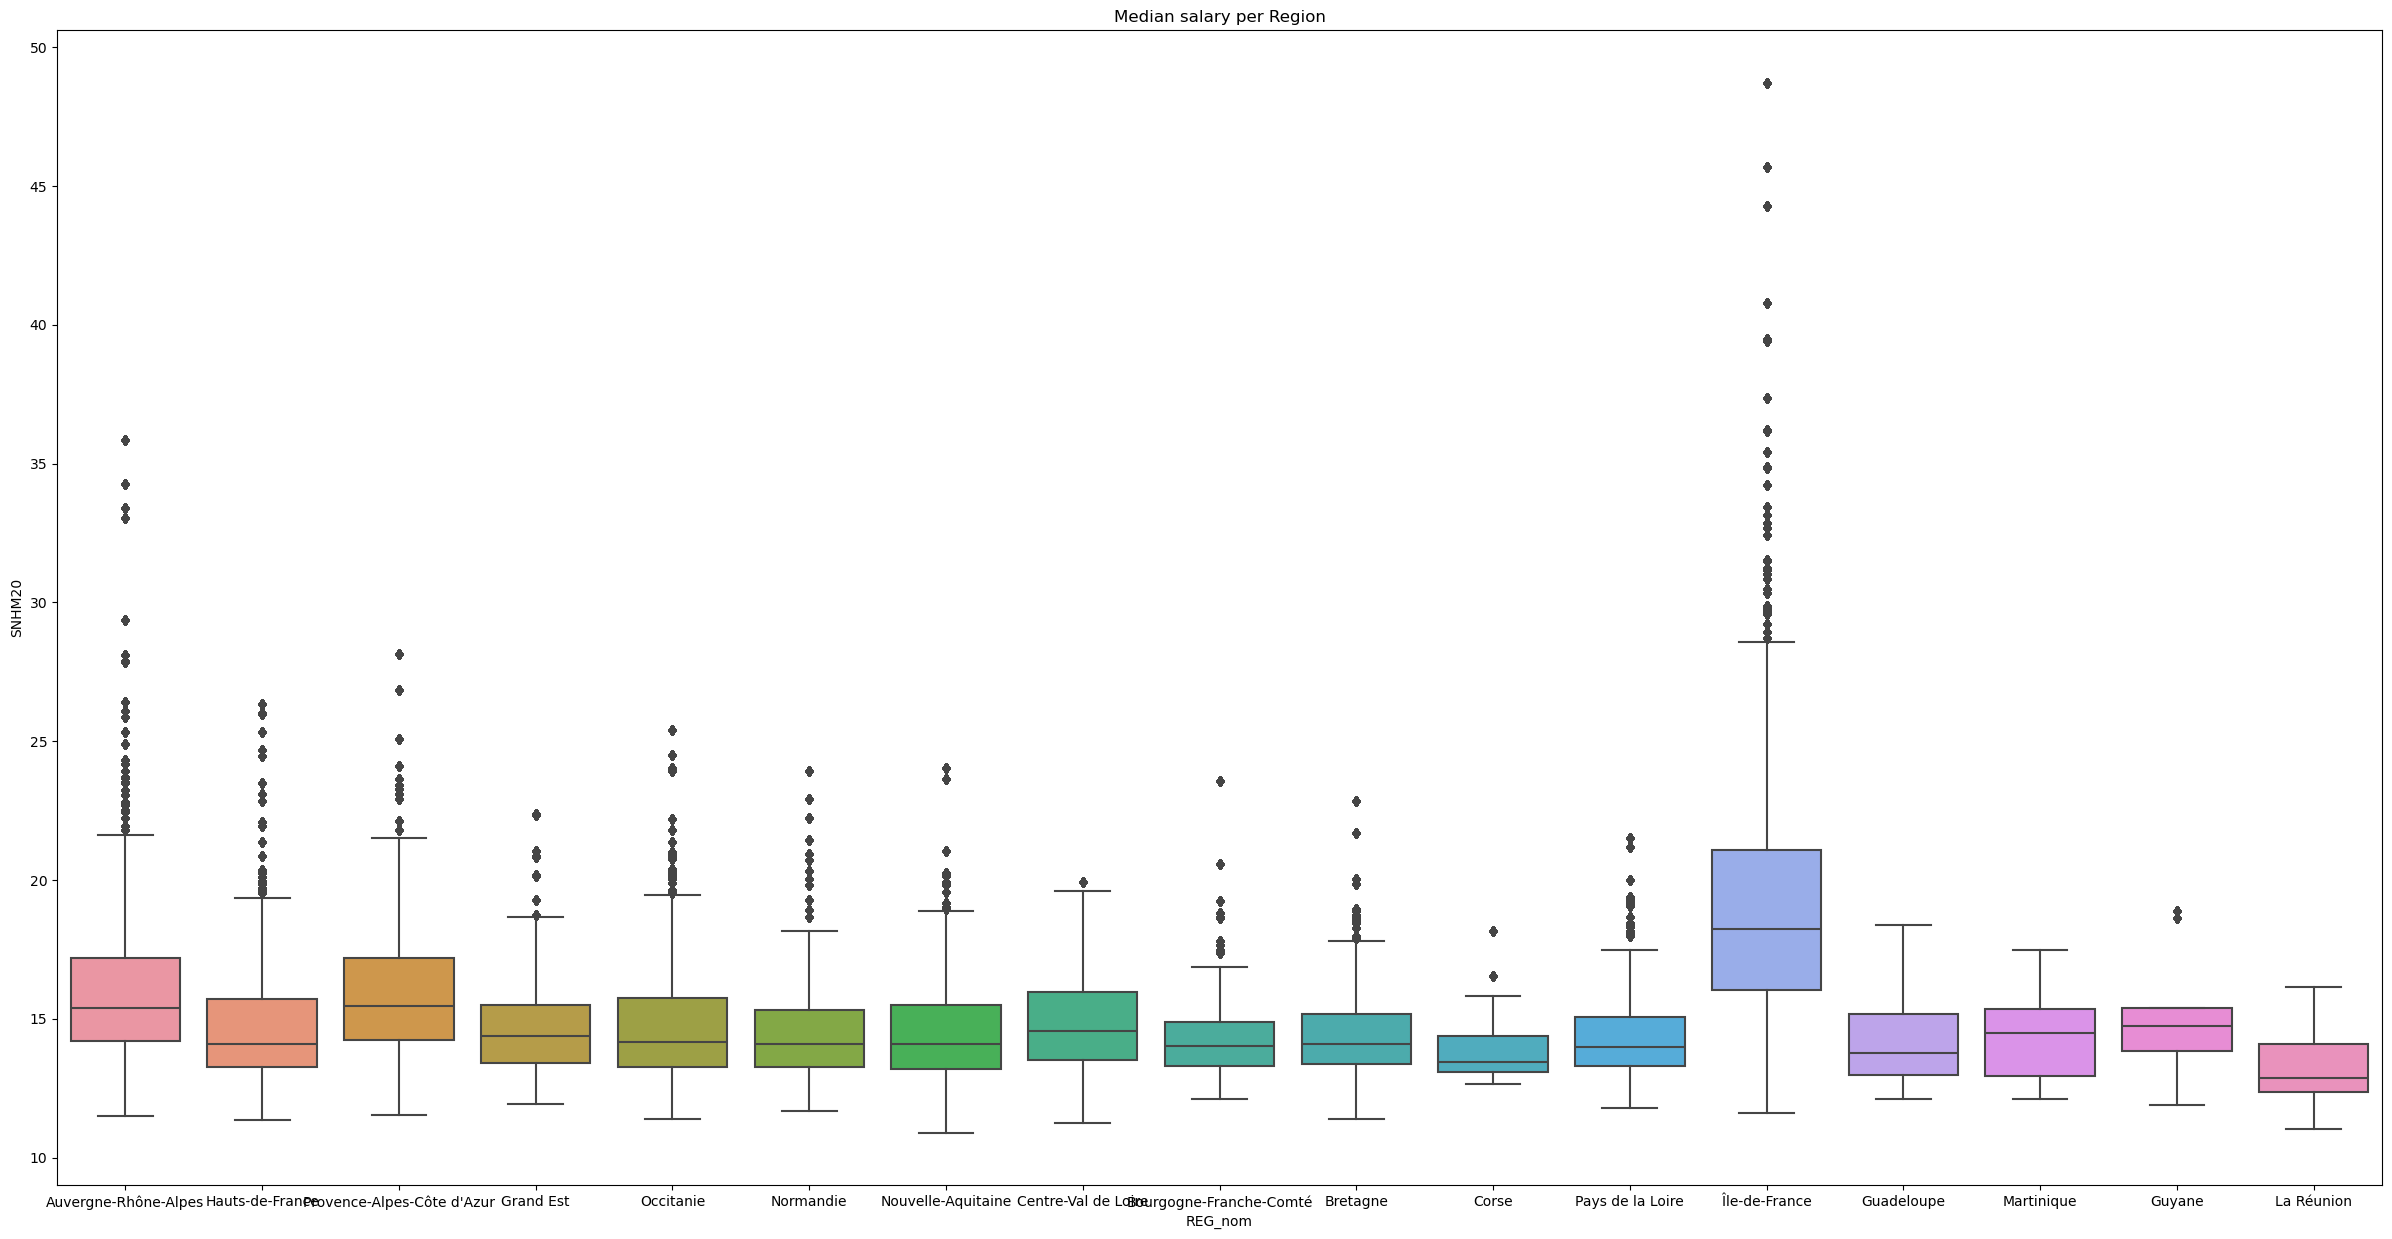

In [23]:
#Box plot (visibilité des valeurs aberrantes)
plt.figure(figsize=(30, 15));
sns.boxplot(x = 'REG_nom', y ='SNHM20', data = df_merge3)
plt.title('Median salary per Region')
plt.show()

**Conclusions :**

Dispersion : plus la boîte est longue, plus la dispersion des salaires moyens est grande dans une région, c'est le cas de l'Ile de France. (A l'inverse de la Bourgogne Franche-Comté, de la Corse ou de la Guyane).

Valeurs aberrantes : Les points situés à l'extérieur des « moustaches » du boxplot représentent les valeurs aberrantes, c'est-à-dire les salaires moyens qui sont considérablement plus élevés ou plus bas que la norme dans une région. 

C'est le cas pour un grand nombre de régions dont l'IDF qui détient la palme. La conclusion est inverse pour les DOM-TOM, la Corse et le Centre Val de Loire.

##### Section 2.2.2 Représentations graphiques de la distribution des salaires des femmes et des hommes de plus de 50 ans dans l'industrie en France <a class="anchor" id="section_2_2_2"></a>

/Users/nataliakostiuk/miniconda3/envs/fi_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


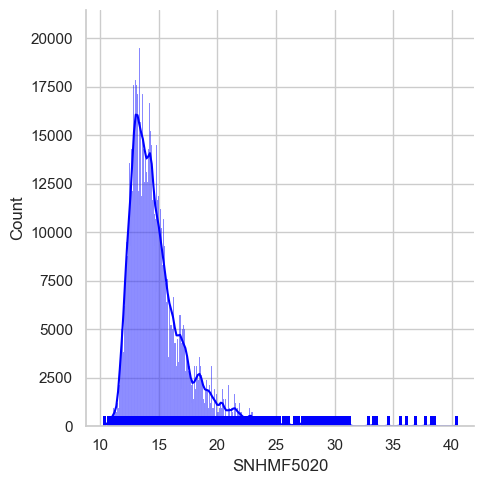

In [80]:
# Premier subplot pour les femmes de plus de 50 ans

sns.displot(df_merge3['SNHMF5020'], kde=True, rug = True, color ='blue') 
plt.show()


La courbe KDE est inclinée vers la gauche, cela peut indiquer une concentration autour des salaires les plus bas. La concentration est plus importante aux alentours des 12€/h

C:\Users\xmcom\anaconda3\envs\FRENCHINDUSTRYXAVIER\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\xmcom\anaconda3\envs\FRENCHINDUSTRYXAVIER\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


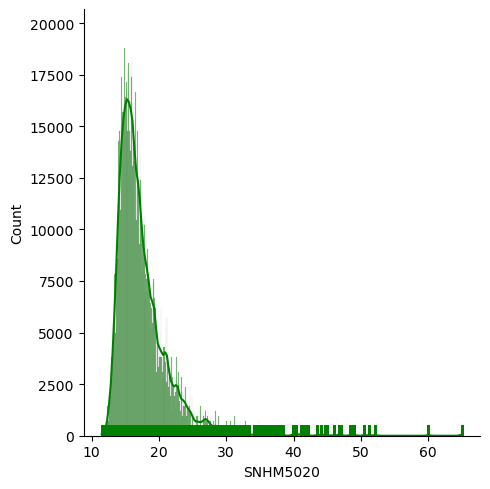

In [64]:
# Deuxième subplot pour les hommes de plus de 50 ans
sns.displot(df_merge3['SNHM5020'], kde=True, rug=True, color='green', ax=axes[1])
plt.show()

La courbe KDE est inclinée vers la gauche, cela peut indiquer une concentration autour des salaires les plus bas. La concentration est plus importante aux alentours des 15€/h. Les salaires même faibles sont supérieurs chez les hommes que chez les femmes.

##### Section 2.2.3 Représentation graphique des salaires des femmes de plus de 50 ans par région <a class="anchor" id="section_2_2_3"></a>

<Figure size 3000x1000 with 0 Axes>

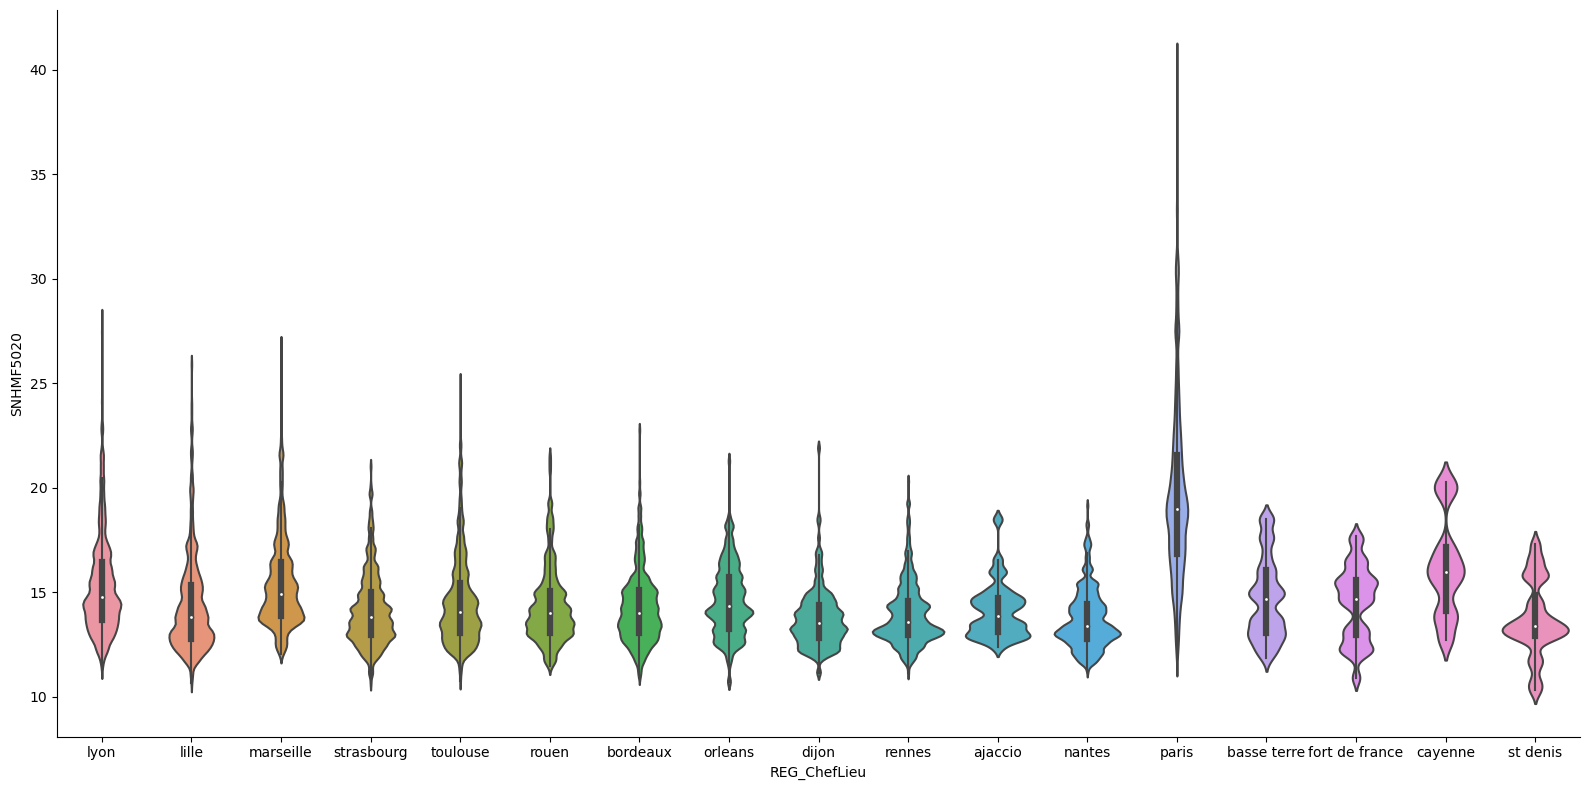

In [57]:
plt.figure(figsize=(30, 10));
sns.catplot(x = "REG_ChefLieu", y = "SNHMF5020", data = df_merge3, kind = "violin", 
            split = True, height=8, aspect=2, fontsize=10, labelpad=20, rotation=90);
plt.show();

Disparité : si un violon est plus large et plus plat que les autres, cela peut indiquer une plus grande disparité des salaires dans ce chef-lieu. 
Le cas de l'Ile de France est l'antinomie de cette conjecture (un violon plus étroit et plus élevé indique une concentration plus élevée de salaires autour d'une valeur moyenne). Rennes et Nantes sont des régions où les salaires sont plus disparates vs. l'Ile de France.

Médiane : la ligne médiane à l'intérieur du violon représente la médiane des salaires. 
C'est la valeur centrale de la distribution des salaires pour ce groupe spécifique de femmes dans ce chef-lieu.

Paris et Marseille ont des valeurs médianes plus élevées que les autres villes <=> les salaires des femmes sont en moyenne plus élevées dans ces villes a contrario de Lille ou Saint Denis de la Réunion par exemple


##### Section 2.2.3 Représentation graphique des salaires des hommes de plus de 50 ans par région <a class="anchor" id="section_2_2_3"></a>

<Figure size 3000x1000 with 0 Axes>

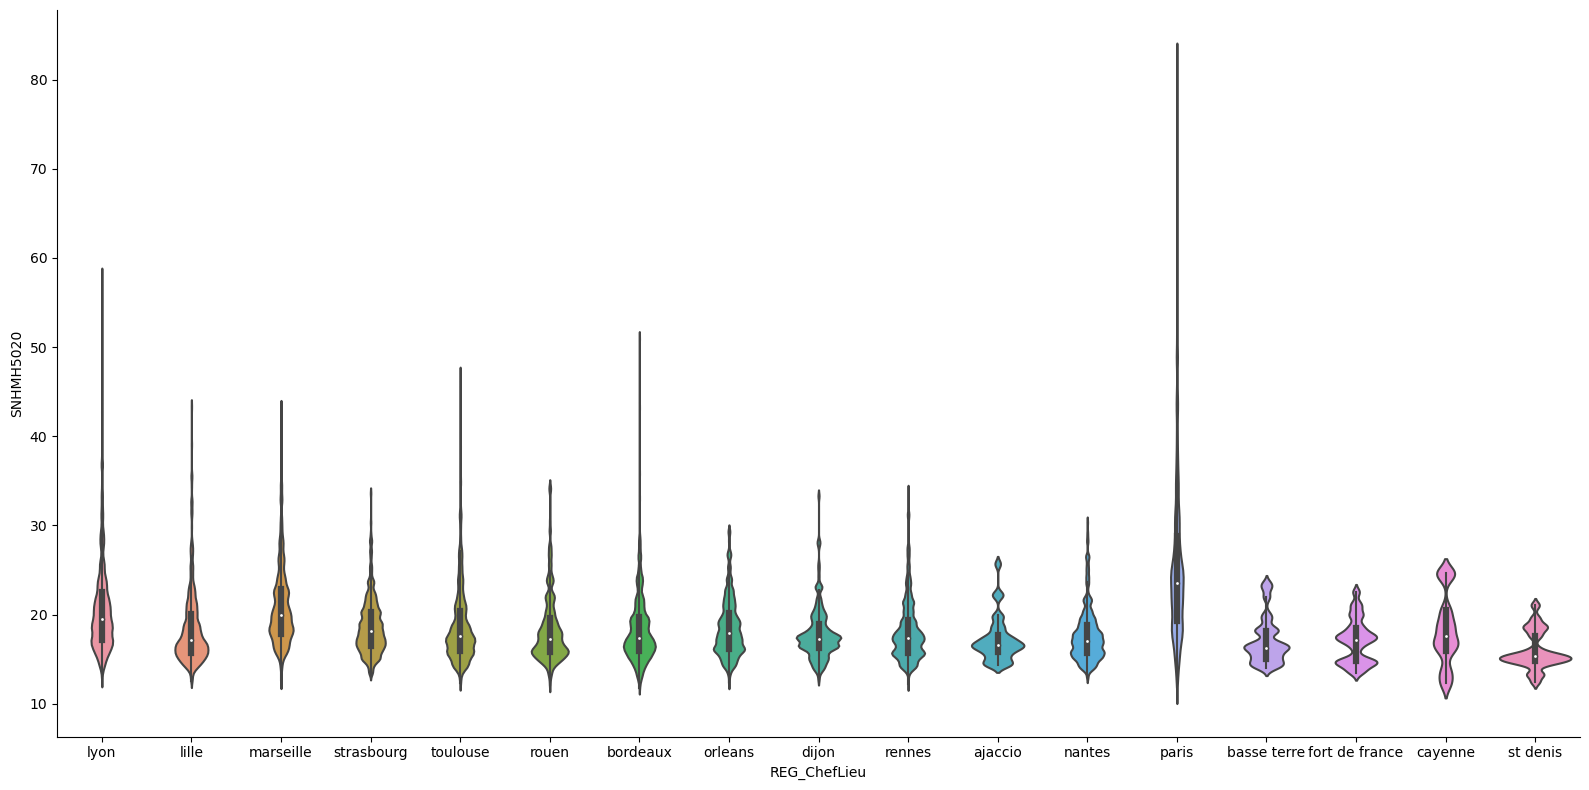

In [58]:
plt.figure(figsize=(30, 10));
sns.catplot(x = "REG_ChefLieu", y = "SNHMH5020", data = df_merge3, kind = "violin", 
            split = True,height=8, aspect=2, fontsize=10, labelpad=20, rotation=90);
plt.show();

Les interprétations sont sensiblement les mêmes que pour l'analyse des salaires des femmes de plus de 50 ans.
La différence notable est le niveau de salaire nettement plus élevé chez les hommes que chez les femmes, c'est très visible en terme de concentration (surtout en IDF)

##### Section 2.2.4 Corrélation entre les tailles d'entreprise et les salaires moyens (heatmap) <a class="anchor" id="section_2_2_4"></a>

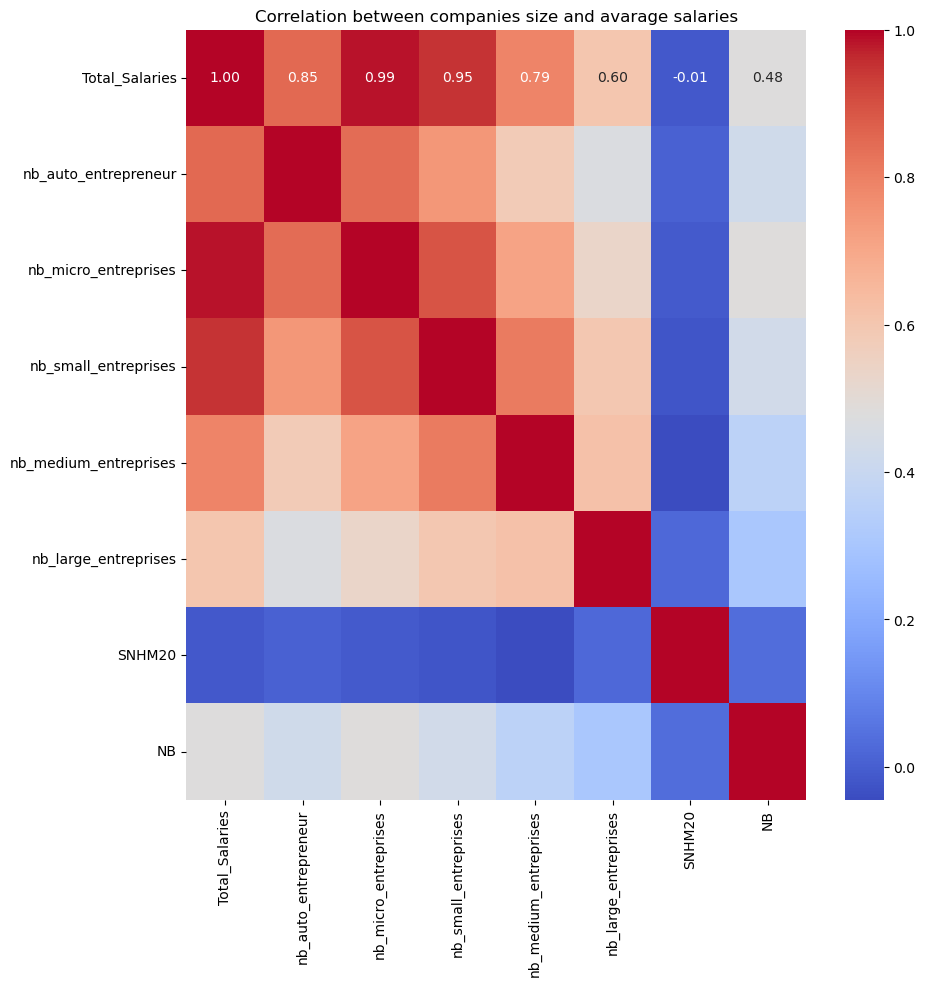

In [28]:
# Correlation between companies size and avarage salaries
selected_columns = ['Total_Salaries', 'nb_auto_entrepreneur','nb_micro_entreprises', 'nb_small_entreprises', 
                    'nb_medium_entreprises', 'nb_large_entreprises', 'SNHM20', 'NB']
selected_df = df_merge3[selected_columns]

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between companies size and avarage salaries')
plt.show()

On note assez peu de corrélations entre les salaires médians et les tailles d'entreprises.

##### Section 2.2.5 Représentation graphique du nombre d'employés par région <a class="anchor" id="section_2_2_5"></a>

In [34]:
# Aggregate the data by REG_nom and sum the number of enterprises
reg_name_enterprises = df_merge3.groupby('REG_nom')['Total_Salaries'].sum().reset_index()

# Sort DataFrame by the 'Total_Salaries' column
reg_name_enterprises_sorted = reg_name_enterprises.sort_values(by='Total_Salaries', ascending=False)
#display(reg_name_enterprises_sorted)

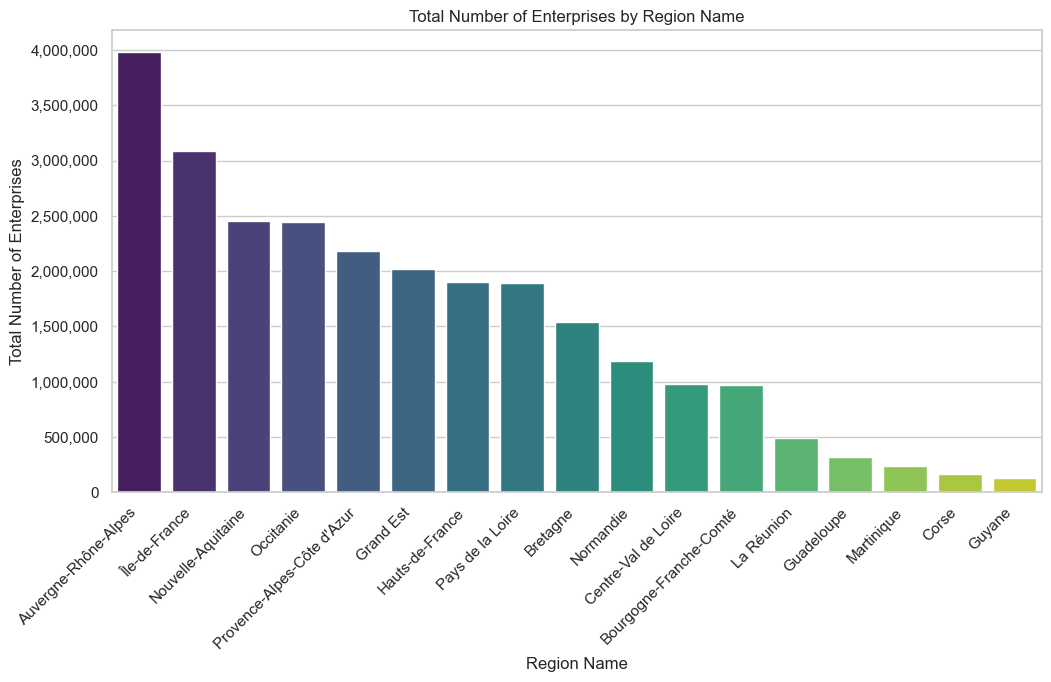

In [81]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='REG_nom', y='Total_Salaries', data=reg_name_enterprises_sorted, palette='viridis' )
plt.title('Total Number of Enterprises by Region Name')
plt.xlabel('Region Name')
plt.ylabel('Total Number of Enterprises')
plt.xticks(rotation=45, ha='right')

# Customize the y-axis ticks to show whole numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show();


La région qui compte le plus grand nombre de salariés dans l'industrie (près de 4 millions) est Auvergne-Rhône-Alpes.

##### Section 2.2.6 Représentation graphique du type d'entreprises par Chef lieu des régions françaises <a class="anchor" id="section_2_2_6"></a>

In [67]:
# Aggregate the data by regional capital and sum the counts of each type of enterprise
region_enterprise_counts = df_merge3.groupby('REG_ChefLieu')[['nb_auto_entrepreneur','nb_micro_entreprises', 'nb_small_entreprises', 'nb_medium_entreprises', 'nb_large_entreprises']].sum().reset_index()

region_enterprise_counts_sorted = region_enterprise_counts.sort_values(by = 'nb_micro_entreprises', ascending = False)

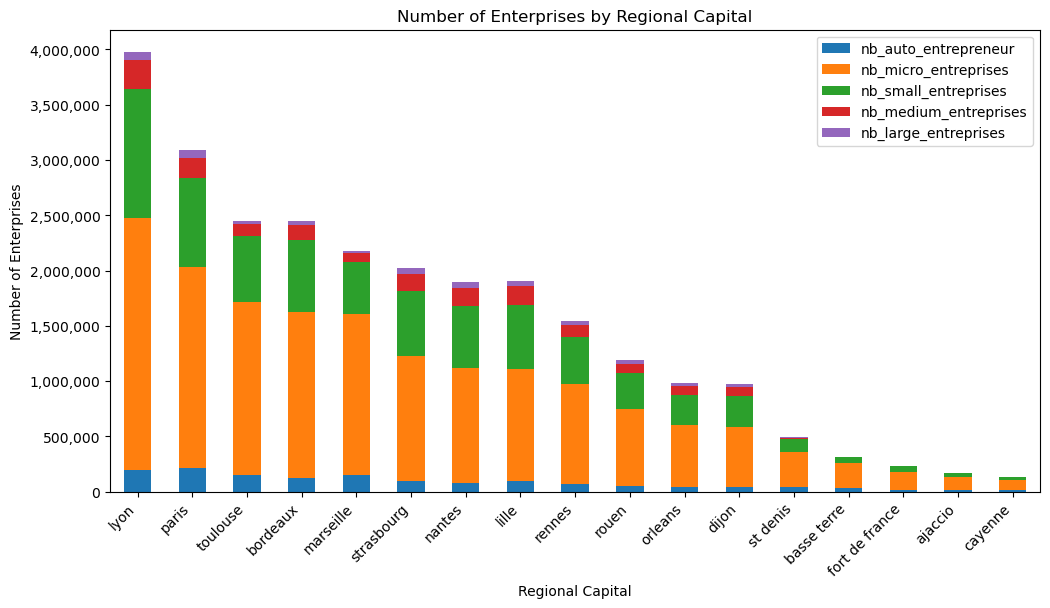

In [68]:
region_enterprise_counts_sorted.plot(x='REG_ChefLieu', kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Enterprises by Regional Capital')
plt.xlabel('Regional Capital')
plt.ylabel('Number of Enterprises')
plt.xticks(rotation=45, ha='right')

# Customize the y-axis ticks to show whole numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

La représentation des micro-entreprises dans l'industrie est majoritaire dans toutes les grandes villes françaises. Lyon est N°1 comme évoqué dans la représentation graphique précédente.

### Chapitre 3. Nettoyage de données et Pre-procession  <a class="anchor" id="chapter3"></a>

#### Section 3.1. df_name_geographic dataset preprocessing <a class="anchor" id="section_3_1"></a>


In [38]:
# Detection errors in the longitude, latitude columns

print(df_name_geographic.longitude.apply(detection_error).loc[df_name_geographic.longitude.apply(detection_error).notna()].values)
print(df_name_geographic.latitude.apply(detection_error).loc[df_name_geographic.latitude.apply(detection_error).notna()].values)

['5,83' '6,01' '6,24' '5,82' '6,31' '4,77' '0,94' '2,07' '0,97' '1,54'
 '1,67' '1,5' '1,78' '1,69' '1,8' '1,63' '1,8' '1,88' '1,67' '0,89' '1,21'
 '1,23' '0,98' '1,15' '1,31' '1,09' '1,18' '1,5' '1,38' '1,11' '1,71'
 '1,93' '1,17' '1,12' '1,68' '1,64' '1,28' '1,02' '1,17' '1,5' '2,25'
 '2,03' '2,15' '2,43' '3,09' '2,89' '4,76' '0,08' '2,51' '4,33' '-2,24'
 '-3,43' '1,91' '1,3' '-5,1' '1,29' '1,2' '5,28' '5,28' '5,96' '1,74'
 '4,07' '3,89' '3,89' '3,48' '3,47' '3,93' '2,93' '3,93' '3,84' '1,76'
 '3,01' '2,03' '4,9' '4,32' '5,84' '2,55' '-0,75' '1,95' '1,97' '6,74'
 '5,04' '-1,94' '0,25' '0,41' '3,28']
[]


In [39]:
# Replacing commas to dots
df_name_geographic["longitude"] = df_name_geographic["longitude"].apply(lambda x: str(x).replace(',','.'))
df_name_geographic["longitude"] = df_name_geographic["longitude"].astype(float)

#df_name_geographic.dtypes

In [40]:
# Verification of duplicates by code_insee in df_name_geographic 
df_name_geographic[df_name_geographic.duplicated(subset = ['code_insee'])]

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
2293,Sud-Est,93,Provence-Alpes-Côte d'Azur,Marseille,06,Alpes-Maritimes,Nice,2,Nice,06000,6088,43.700000,7.250000,1.08
2296,Sud-Est,93,Provence-Alpes-Côte d'Azur,Marseille,06,Alpes-Maritimes,Nice,3,Nice,06000,6088,43.700000,7.250000,1.08
2361,Sud-Est,93,Provence-Alpes-Côte d'Azur,Marseille,06,Alpes-Maritimes,Nice,5,Nice,06000,6088,43.700000,7.250000,1.08
2994,Est,21,Champagne-Ardenne,Châlons-en-Champagne,08,Ardennes,Charleville-Mézières,2,Charleville-Mézières,08000,8105,49.766667,4.716667,1.00
3909,Est,21,Champagne-Ardenne,Châlons-en-Champagne,10,Aube,Troyes,2,Troyes,10000,10387,48.300000,4.083333,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36503,Île-de-France,11,Île-de-France,Paris,94,Val-de-Marne,Créteil,7,Saint-Maur-des-Fossés,94100,94068,48.800000,2.500000,0.64
36512,Île-de-France,11,Île-de-France,Paris,94,Val-de-Marne,Créteil,10,Vitry-sur-Seine,94400,94081,48.783333,2.400000,0.90
36515,Île-de-France,11,Île-de-France,Paris,94,Val-de-Marne,Créteil,11,Gentilly,94250,94037,48.816667,2.333333,1.92
36679,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,8,Sarcelles,95200,95585,49.000000,2.383333,1.51


In [41]:
# Drop duplicates by code_insee in name_geographic
df_name_geographic.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)

In [42]:
# Verify the unique lengths of strings in the 'code_insee' column of df

unique_lengths_df_name_geographic = get_unique_lengths(df_name_geographic['code_insee'])

print("Unique lengths in 'code_insee' column, df_name_geographic:", unique_lengths_df_name_geographic)

Unique lengths in 'code_insee' column, df_name_geographic: [4 5]


In [43]:
# Adding leading zeros for the code_insee column

add_leading_zeros(df_name_geographic,'code_insee', 5)


In [44]:
# Verification of unique lengths in 'code_insee' column
print("Unique lengths in 'code_insee' column, df_name_geographic:", get_unique_lengths(df_name_geographic['code_insee']))

Unique lengths in 'code_insee' column, df_name_geographic: [5]


In [45]:
print(df_entreprises.shape, df_name_geographic.shape)

(36681, 14) (36693, 14)


#### Section 3.2. df_entreprises dataset preprocessing <a class="anchor" id="section_3_2"></a>

In [46]:
# Create a new column for the enterprise types

df_entreprises['nb_micro_entreprises'] = df_entreprises['E14TS1'] + df_entreprises['E14TS6']
df_entreprises['nb_small_entreprises'] = df_entreprises['E14TS10'] + df_entreprises['E14TS20']
df_entreprises['nb_medium_entreprises'] = df_entreprises['E14TS50'] + df_entreprises['E14TS100']
df_entreprises['nb_large_entreprises'] = df_entreprises['E14TS200'] + df_entreprises['E14TS500']

In [47]:
df_entreprises.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'E14TST', 'E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500', 'nb_micro_entreprises', 'nb_small_entreprises',
       'nb_medium_entreprises', 'nb_large_entreprises'],
      dtype='object')

In [48]:
# Drop unuseful columns in df_entreprises

#df_entreprises = df_entreprises.drop()

In [49]:
# Verify the unique lengths of strings in the 'CODGEO' column of df

unique_lengths_df_entreprises = get_unique_lengths(df_entreprises['CODGEO'])

print("Unique lengths in 'CODGEO' column, df_entreprises:", unique_lengths_df_entreprises)

Unique lengths in 'CODGEO' column, df_entreprises: [5]


In [50]:
# Merge df_entreprises and df_name_geographic

df_merge_ent_geo = pd.merge(left = df_entreprises, right = df_name_geographic, left_on = 'CODGEO', right_on = 'code_insee')


#### Section 3.3. df_salary dataset preprocessing <a class="anchor" id="section_3_3"></a>

In [51]:
# Verify the unique lengths of strings in the 'CODGEO' column of df

unique_lengths_df_salary = get_unique_lengths(df_salary['CODGEO'])
print("Unique lengths in 'CODGEO' column, df_salary:", unique_lengths_df_salary)

Unique lengths in 'CODGEO' column, df_salary: [5]


In [52]:
# Adding leading zeros for the CODGEO column

add_leading_zeros(df_salary, 'CODGEO', 5)

In [53]:
print("Unique lengths in 'CODGEO' column, df_salary:", get_unique_lengths(df_salary['CODGEO']))

Unique lengths in 'CODGEO' column, df_salary: [5]


#### Section 3.4. df_population dataset preprocessing <a class="anchor" id="section_3_4"></a>

In [54]:
# Verify the unique lengths of strings in the 'CODGEO' column of df

unique_lengths_df_population = get_unique_lengths(df_population['CODGEO'])

print("Unique lengths in 'CODGEO' column, df_population:", unique_lengths_df_population)

Unique lengths in 'CODGEO' column, df_population: [5]


### Chapitre 4. <a class="anchor" id="chapter4"></a>

#### Section 4.1.  <a class="anchor" id="section_4_1"></a>

In [55]:
summary(df_entreprises)
summary(df_salary)
summary(df_population)


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,36681,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,34142,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
REG,int64,0.0,27,0,0.0,Too many values...,49.415365,Nothing to report
DEP,object,0.0,101,0,0.0,Too many values...,62,Nothing to report
E14TST,int64,0.0,1423,399,1.0,Too many values...,123.456067,Nothing to report
E14TS0ND,int64,0.0,1125,579,2.0,Too many values...,83.555301,Nothing to report
E14TS1,int64,0.0,650,6118,17.0,Too many values...,27.291486,Nothing to report
E14TS6,int64,0.0,272,20324,55.0,Too many values...,5.22055,Nothing to report
E14TS10,int64,0.0,220,22641,62.0,Too many values...,3.800333,Nothing to report
E14TS20,int64,0.0,160,25884,71.0,Too many values...,2.296448,Nothing to report


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,5421,0,0.0,Too many values...,01004,Nothing to report
SNHM20,float64,0.0,5421,0,0.0,Too many values...,15.440462,Nothing to report
SNHMC20,float64,0.0,5421,0,0.0,Too many values...,25.194776,Nothing to report
SNHMP20,float64,0.0,5421,0,0.0,Too many values...,15.847373,Nothing to report
SNHME20,float64,0.0,5421,0,0.0,Too many values...,11.573974,Nothing to report
SNHMO20,float64,0.0,5421,0,0.0,Too many values...,12.124348,Nothing to report
SNHMF20,float64,0.0,5421,0,0.0,Too many values...,13.824962,Nothing to report
SNHMFC20,float64,0.0,5421,0,0.0,Too many values...,22.03816,Nothing to report
SNHMFP20,float64,0.0,5421,0,0.0,Too many values...,14.682978,Nothing to report
SNHMFE20,float64,0.0,5421,0,0.0,Too many values...,11.402604,Nothing to report


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
NIVGEO,object,0.0,1,0,0.0,[COM],COM,It's imbalanced!
CODGEO,object,0.0,35868,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,33452,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
MOCO,int64,0.0,7,0,0.0,"[11, 12, 21, 22, 23, 31, 32]",11,Nothing to report
AGEQ80_17,int64,0.0,17,502152,6.0,Too many values...,0,Nothing to report
SEXE,int64,0.0,2,0,0.0,"[1, 2]",1,Nothing to report
NB,int64,0.0,2953,6325631,74.0,Too many values...,7.446743,Nothing to report
